In [2]:
import fastf1
import fastf1.plotting
import numpy as np
import matplotlib.pyplot as plt

In [11]:
session = fastf1.get_session(2019, "Monza", "Q")
session.load()
leclerc_fast = session.laps.pick_drivers('LEC').pick_fastest()
lec_car_data = leclerc_fast.get_car_data().add_distance()

logger      WARNING 	Failed to load schedule from FastF1 backend!
req            INFO 	No cached data found for season_schedule. Loading data...
_api           INFO 	Fetching season schedule...
req            INFO 	Data has been written to cache!
core           INFO 	Loading data for Italian Grand Prix - Qualifying [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading 

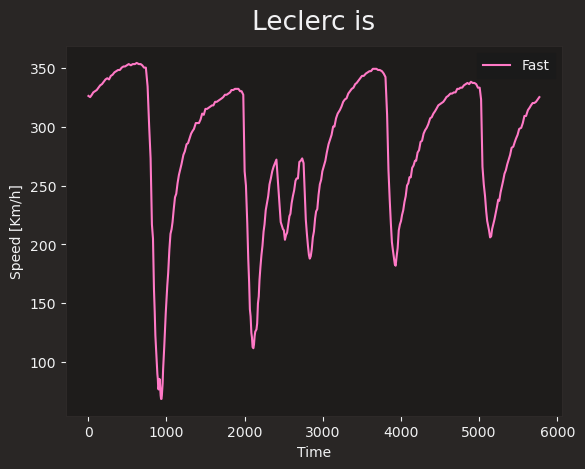

In [16]:
fastf1.plotting.setup_mpl(color_scheme="fastf1")
t_lec = lec_car_data["Distance"]
vCar_lec = lec_car_data['Speed']
fig, ax = plt.subplots()
ax.plot(t_lec, vCar_lec, label='Fast')
ax.set_xlabel('Time')
ax.set_ylabel('Speed [Km/h]')
ax.set_title('Leclerc is')
ax.legend()
plt.show()

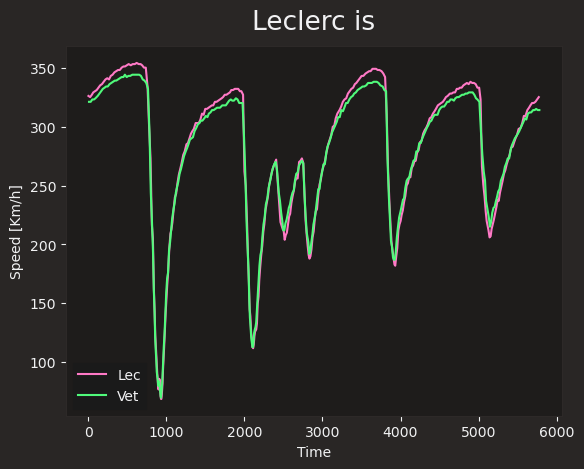

In [ ]:
vettel_fast = session.laps.pick_drivers('VET').pick_fastest()
vet_car_data = vettel_fast.get_car_data().add_distance()
t_vet = vet_car_data['Distance']
vCar_vet = vet_car_data['Speed']
fig, ax1 = plt.subplots()
ax1.plot(t_lec, vCar_lec, label='Lec')
ax1.plot(t_vet, vCar_vet, label='Vet')
ax1.set_xlabel('Time')
ax1.set_ylabel('Speed [Km/h]')
ax1.set_title('Leclerc is')
ax1.legend()
plt.show()

no data


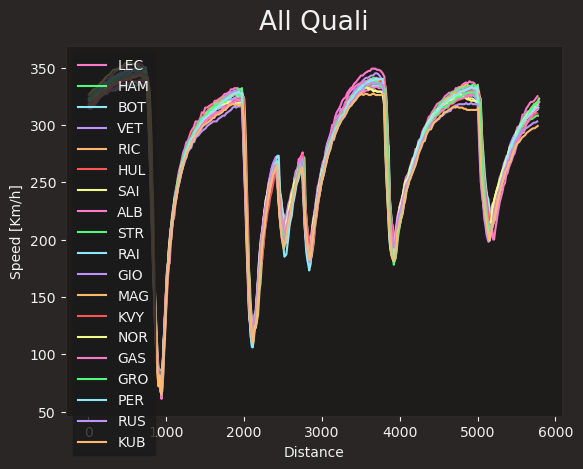

In [32]:
drivers = [session.get_driver(i)["Abbreviation"] for i in session.drivers]
session_results = {}
for driver in drivers:
    try:
        driver_fastest = session.laps.pick_drivers(driver).pick_fastest()
        driver_fastest = driver_fastest.get_car_data().add_distance()
        t = driver_fastest['Distance']
        vCar = driver_fastest["Speed"]
        session_results[driver] = [t, vCar]
    except:
        print("no data")
fig, ax1 = plt.subplots()
for key in session_results.keys():
    data = session_results[key]
    ax1.plot(data[0], data[1], label=key)
ax1.set_xlabel('Distance')
ax1.set_ylabel('Speed [Km/h]')
ax1.set_title('All Quali')
ax1.legend()
plt.show()